In [2]:
# toy distrb 만들기

# 4개의 STR 형식 분포 +  1개의 상관계수 분포

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
# reg

def reg_test(x:int, t:float):
    if x == 0:
        return 0.25
    else:
        y = 0.25
        for u in range(x):
            y = t*y*(1-y)
        return y

In [4]:
reg_test(10, 3.2)

0.7992712282620194

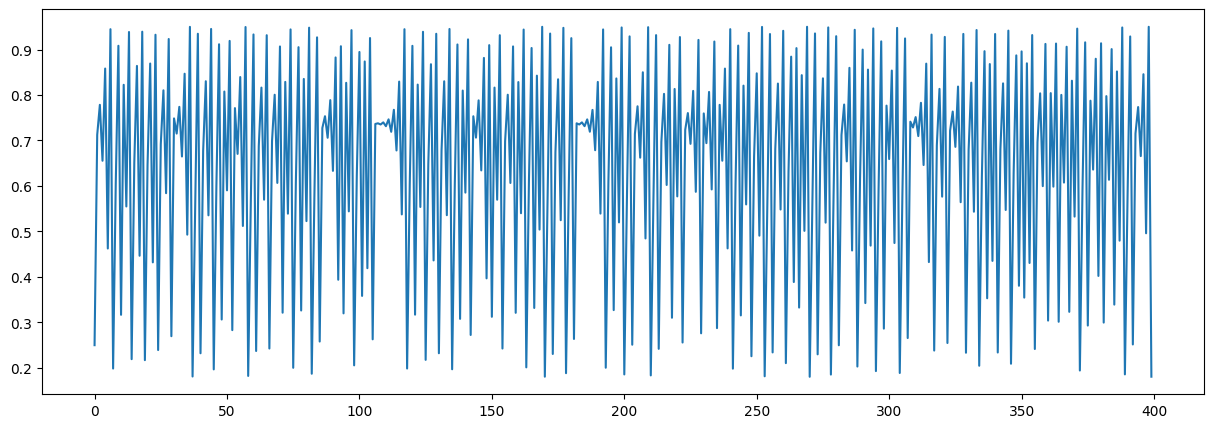

In [25]:
# reg_test_graph

x0 = range(400)
t0 = 3.8
y0 = [reg_test(x, t0) for x in x0]
plt.figure(figsize=(15,5))
plt.plot(x0, y0)
plt.show()

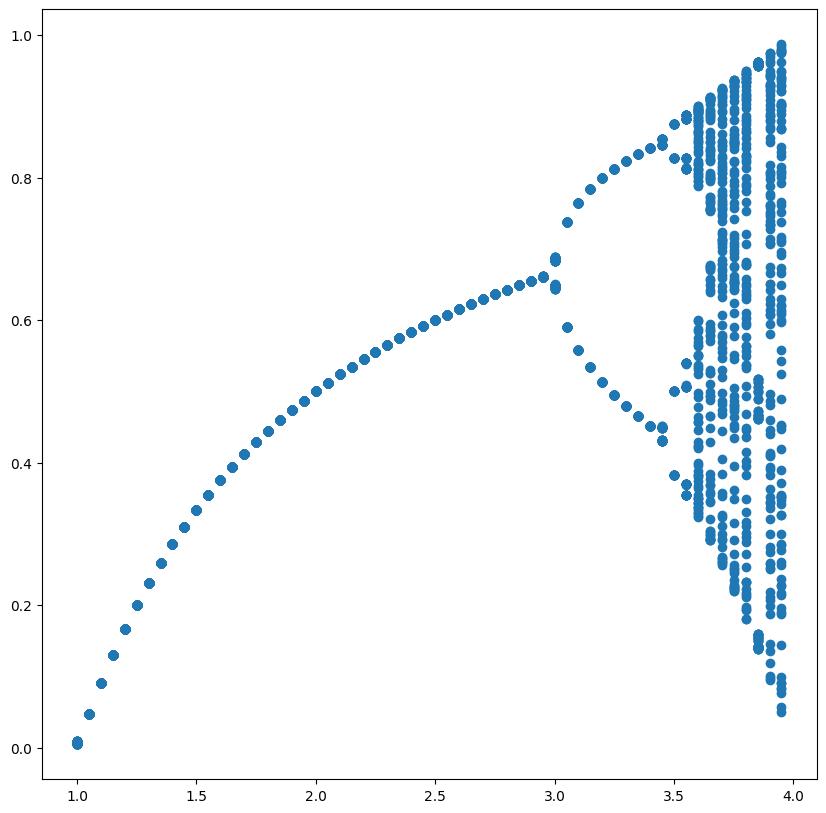

In [27]:
t0_range = [0.05*t for t in range(20, 80)]

plt.figure(figsize=(10,10))
plt.scatter([t0_range]*100, np.concatenate([[reg_test(u, t*0.05) for t in range(20, 80)] for u in range(100,200)]))
plt.show()

In [5]:
# step 
import random
from scipy import signal
x1 = range(96*60) # 편의상 

# y1, y2, y3, y4 생성 (seasonal)
y1 = [0.005 * x + np.sin(x*np.pi/1600) + 0.02*random.random() for x in x1]
y2 = [-0.2* signal.sawtooth(x*np.pi/960, 0.5) +  0.01* np.sqrt(x) - 0.004*random.random() for x in x1]
y3 = [0.2*(x**0.2)*reg_test(x, 3.6) - 0.004*random.random() for x in x1]
y4 = [0.001*x + 0.2*random.random() for x in x1]
y5 = [0.3*y1[t] + 0.2*y2[t-1] + 0.1*y3[t] + 0.2*y4[t] + 0.2*y4[t-1] if t>0 else 0.3*y1[t] + 0.1*y3[t] + 0.2*y4[t] for t in x1]

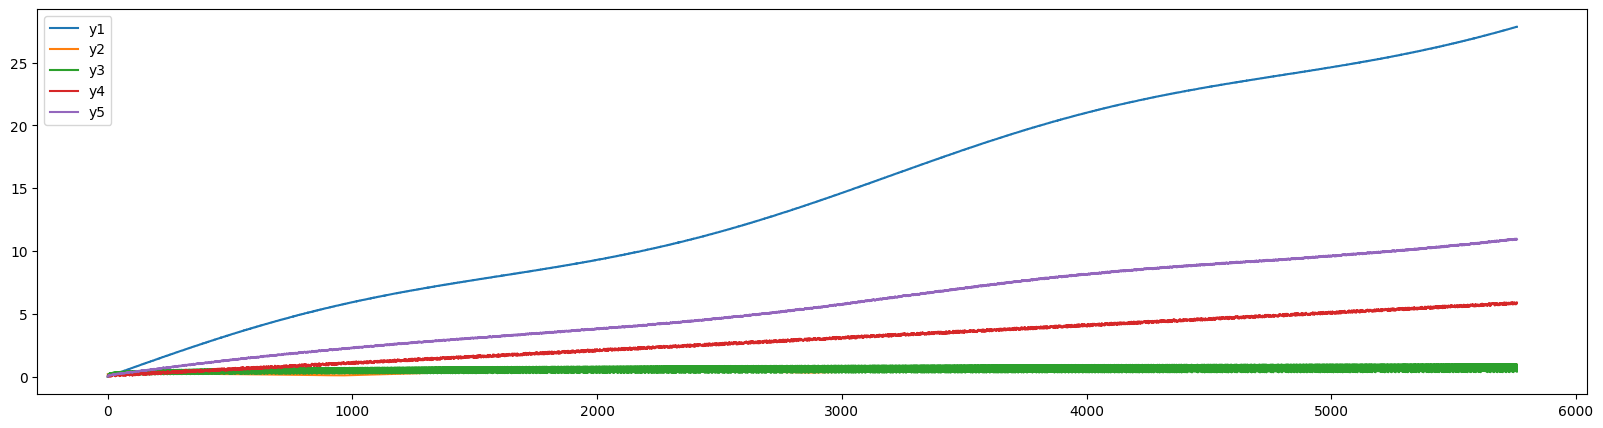

In [7]:
plt.figure(figsize=(20,5))
plt.plot(x1, y1, label='y1')
plt.plot(x1, y2, label='y2')
plt.plot(x1, y3, label='y3')
plt.plot(x1, y4, label='y4')
plt.plot(x1, y5, label='y5')
plt.legend()
plt.show()

In [60]:
# npy 파일로 변환해서 저장
columns = ['col1', 'col2', 'col3', 'col4', 'OT']
data = {
    'col1': y1,
    'col2': y2,
    'col3': y3,
    'col4': y4,
    'OT': y5
}
df_new = pd.DataFrame(data=data, columns=columns)
df_new

,col1,col2,col3,col4,OT
0,0.008699,0.196052,-0.002782,0.057811,0.013894
1,0.025271,0.207449,0.131303,0.187169,0.108918
2,0.014174,0.212344,0.179893,0.005977,0.102360
3,0.038683,0.215801,0.147747,0.062696,0.082583
4,0.030703,0.218020,0.226845,0.166460,0.120887
...,...,...,...,...,...
5755,27.838115,0.955418,0.444453,5.798242,10.899419
5756,27.833202,0.956174,0.967850,5.822263,10.961930
5757,27.844782,0.953625,0.487363,5.913394,10.940537
5758,27.849005,0.955137,0.997713,5.839863,10.995849


In [61]:
theme = 'toy'
arr_df = df_new.to_numpy().reshape(len(df_new), len(columns), 1)
np.savez(f'./dataset/{theme}/{theme}_2.npz', data=arr_df)

In [2]:
%matplotlib inline

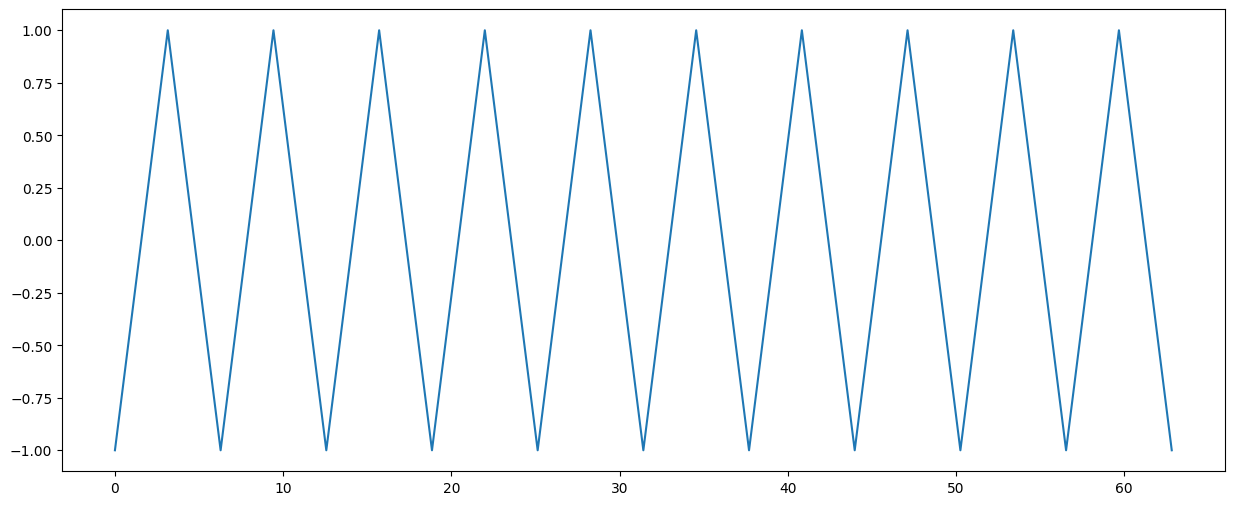

In [7]:
from scipy import signal

x2 = np.linspace(0, 2*np.pi*10, 1001)
y20 = [signal.sawtooth(x, 0.5) for x in x2]

plt.figure(figsize=(15,6))
plt.plot(x2, y20)
plt.show()

In [ ]:
# 예측하기
